In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
#from mpl_toolkits.basemap import Basemap WHYYY IS IT NOT IMPORTING 
GM = 398600.4415 #km^3 s^-2
RE = 6367 #km - Radius of the Earth

In [3]:
################# GROUND TRACKS ###########

In [4]:
# General Method to get ground tracks
#
#
#Given a set of initial conditions in ECI coordinates we can now predict satellite trajectory using the following steps
#
# let X_bar(t0) = initial state
#
# 1) Convert ECI to Keplerian Elements (CAR2KEP) at t=t0
# 2) For a given number of time steps:
#        Use Keplerian prediction algorithm to obtain X_bar(t0+dt)
#NOTE### The newdt must be set further down in orbit propagation
#        Use ECI to ECEF to convert X_bar(t0+dt) to X_bar_ECEF
#        Convert X_bar_ECEF to lat/long/height
#        Write timetag lat/long/height to file (maybe pandas dataframe)
#        Set t0  = t+dt #increment the timetag
#        Set X_bar(t0) = X_bar(t0+dt) #update the state
#        End of for loop
#Once a file with t,phi,lambda,h is made, it can be plotted into a map

In [5]:
###Defining the variables###

# Getting lat/long/heihgt from ECEF coordinates
# Lambda = Longitude
# Phi = Latitude
# P = point coordinate vector (x,y,z)
# P_x = x-coordinate of the point p
# P_y = y-coordinate of the point p
# P_z = z-coordinate of the point p
# r_mag = magnitude of the radius vector of the satellite
# e = east unit vector 
# n = north unit vector 
# u = up unit vector
RE =6367 #= Earth Radius in km 

---

In [6]:
################# STARTING WITH KEP2CAR ###########

In [7]:
# a= float(input('semi-major axis:')) #in km
# e= float(input('eccentricity:')) #in km
# i= float(input('inclination:')) #in km
# w= float(input('argument of perigee:')) #in km/s
# W= float(input('RAAN:')) #in km/s
# V= float(input('True Anomaly:')) #in km/s

# Specified_Orbit_Geometry = pd.DataFrame ({"Orbital Parameter":["semi-major axis - a","eccentricity - e","inclination - i","argument of perigee - w","RAAN - W","TRAN - V"],
#                                           "Keplerian": [a,e,i,w,W,V]})
# print ('\nSpecified Orbit Geometry:')
# Specified_Orbit_Geometry

In [8]:
a   = 7719.637186          
e   =  0.000493          
i   =  1.152689          
w   =  1.161349          
W   =  3.167019          
V   =  5.501897

In [9]:
#Compute the in-orbital plane Gaussian Vectors
#This gives P and Q in ECI components

P = np.matrix([[np.cos(W)*np.cos(w)-np.sin(W)*np.cos(i)* np.sin(w)],
              [np.sin(W)*np.cos(w)+np.cos(W)*np.cos(i)* np.sin(w)],
              [np.sin(i)*np.sin(w)]])

Q = np.matrix([[-np.cos(W)*np.sin(w)-np.sin(W)*np.cos(i)*np.cos(w)],
              [-np.sin(W)*np.sin(w)+ np.cos(W)*np.cos(i)* np.cos(w)],
              [np.sin(i)*np.cos(w)]]) 

print('unit vector P:\n',P)
print('unit vector Q:\n',Q)

unit vector P:
 [[-0.3885042 ]
 [-0.38247018]
 [ 0.83832037]]
unit vector Q:
 [[ 0.921154  ]
 [-0.13826777]
 [ 0.36380948]]


In [10]:
#Compute the semi-latus rectum and the radial distance

p = a*(1-(e**2))
r = p/(1+e*np.cos(V))

print('The semi-latus rectum is:',p)
print('The radial distance is:',r)

The semi-latus rectum is: 7719.635309749901
The radial distance is: 7716.93412501557


In [11]:
# x and y are the coordinates of the satellite in the orbital basis 
x = r*np.cos(V)
y = r*np.sin(V)
print(x)
print(y)

5479.076540226578
-5434.224190826928


In [12]:
# We know the inertial vector components along the P and Q vectors. 
#Thus we can project the satellite position onto the ECI basis.
#X_bar is the state vector representing the instantaneous *position* of the satellite

cart_pos_x = (x*P.item(0)) + (y*Q.item(0))
cart_pos_y = (x*P.item(1)) + (y*Q.item(1))
cart_pos_z = (x*P.item(2)) + (y*Q.item(2))

print('x-coordinate:',cart_pos_x)
print('y-coordinate:',cart_pos_y)
print('z-coordinate:',cart_pos_z)


x-coordinate: -7134.4015980671975
y-coordinate: -1344.2053503962836
z-coordinate: 2616.199171181745


In [13]:
#For the velocity components of the state vector we require cosE,sinE,f and g as defined below

In [14]:
cos_E = ((x/a) + e)
sin_E = (y/a*np.sqrt(1-e**2))

In [15]:
f = (np.sqrt(a*GM))/r
g = np.sqrt(1-e**2)

In [16]:
cart_vel_x = (-f*sin_E*P.item(0)) + (f*g*cos_E*Q.item(0))  #x component of velocity - aka 'u'
cart_vel_y = (-f*sin_E*P.item(1)) + (f*g*cos_E*Q.item(1))  #y component of velocity - aka 'v'
cart_vel_z = (-f*sin_E*P.item(2)) + (f*g*cos_E*Q.item(2)) #z component of velocity - aka 'w'

print('u-coordinate:',cart_vel_x)
print('v-coordinate:',cart_vel_y)
print('w-coordinate:',cart_vel_z)

u-coordinate: 2.7370225687820864
v-coordinate: -2.6412753868728953
w-coordinate: 6.099437705233797


In [17]:
Kep2Car = pd.DataFrame ({"Orbital Parameter":["semi-major axis","eccentricity","inclination","argument of perigee","RAAN","TRAN"],
                                    "Keplerian": [a,e,i,w,W,V],"Converted Cartesian":[cart_pos_x,cart_pos_y,cart_pos_z,cart_vel_x,cart_vel_y,cart_vel_z],
                                   })
Kep2Car

,Orbital Parameter,Keplerian,Converted Cartesian
0,semi-major axis,7719.637186,-7134.401598
1,eccentricity,0.000493,-1344.205350
2,inclination,1.152689,2616.199171
3,argument of perigee,1.161349,2.737023
4,RAAN,3.167019,-2.641275
5,TRAN,5.501897,6.099438


In [18]:
################# END OF KEP2CAR ###########

In [19]:
################# STARING ORBIT PROPAGATION ###########

In [20]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

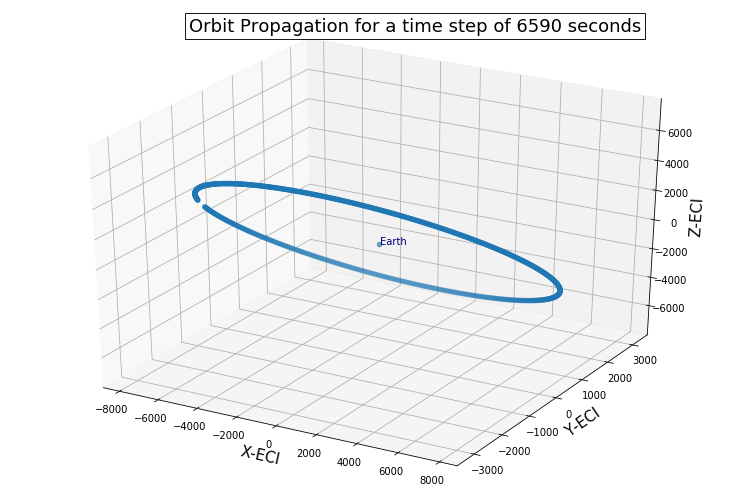

In [22]:
#creating empty lists in which the xyz coordinates will be appended for each new time step - dt
#The three 0's represent the centre of mass of the earth
cart_pos_x_new_list = [0]
cart_pos_y_new_list = [0]
cart_pos_z_new_list = [0]

#empty list to store the time step in each iteration
time_since_prop = [0]

#creating empty lists in which the uvw velocities will be appended for each new time step - dt
cart_vel_x_new_list = [0]
cart_vel_y_new_list = [0]
cart_vel_z_new_list = [0]
 
for newdt in range (0,6600,10):

    #Compute the mean motion
    n = np.sqrt(GM/(a**3))

    # Compute the eccentric anomaly at t=t0
    cos_Eo = ((r * np.cos(V)) / a) + e
    sin_Eo = (r * np.sin(V)) / (a * np.sqrt(1 - e ** 2))

    # adding 2 pi for for very small values ensures that Eo stays in the range 0< Eo <2Pi
    Eo = math.atan2(sin_Eo, cos_Eo)
    if Eo < 0.0:
        Eo = Eo + 2 * np.pi
    else:
        Eo = Eo

    # Compute mean anomaly at start point
    Mo = Eo - e * np.sin(Eo)  # From Kepler's equation

    # Compute the mean anomaly at t+newdt
    Mi = Mo + n * newdt

    # Solve Kepler's equation to compute the eccentric anomaly at t+newdt
    M = Mi

    #Minimal value approaching 0 (level of accuracy)
    min_val = 1E-7

    #Initial Guess at Eccentric Anomaly (taken these conditions from Fundamentals of Astrodynamics by Roger.E.Bate)
    if M < np.pi:
        E = M + (e / 2)
    if M > np.pi:
        E = M - (e / 2)

    #Initial Conditions
    f = E - e*np.sin(E) - M
    f_prime = 1 - e*np.cos(E)
    ratio = f / f_prime

    #Numerical iteration for ratio compared to level of accuracy wanted

    iteration_array = []
    while abs(ratio) > min_val:
        f = E - e*np.sin(E) - M
        f_prime = 1 - e*np.cos(E)
        ratio = f / f_prime

        iteration_array.append(1)

        if abs(ratio) > min_val:
             E = E - ratio
        if abs(ratio) < min_val:
            break

    Ei = E

    # Compute the gaussian vector component x,y
    x_new = a * (np.cos(Ei) - e)
    y_new = a * ((np.sqrt(1 - e ** 2)) * (np.sin(Ei)))

    # Compute the in-orbital plane Gaussian Vectors
    # This gives P and Q in ECI components

    P = np.matrix([[np.cos(W) * np.cos(w) - np.sin(W) * np.cos(i) * np.sin(w)],
                    [np.sin(W) * np.cos(w) + np.cos(W) * np.cos(i) * np.sin(w)],
                    [np.sin(i) * np.sin(w)]])

    Q = np.matrix([[-np.cos(W) * np.sin(w) - np.sin(W) * np.cos(i) * np.cos(w)],
                    [-np.sin(W) * np.sin(w) + np.cos(W) * np.cos(i) * np.cos(w)],
                    [np.sin(i) * np.cos(w)]])

    
    
    # Compute the position vector at t+newdt
    # We know the inertial vector components along the P and Q vectors.
    # Thus we can project the satellite position onto the ECI basis.

    #calcualting the new x coordiante
    cart_pos_x_new = (x_new * P.item(0)) + (y_new * Q.item(0))
    #appending the newly created coordinate to the list created at the top
    cart_pos_x_new_list.append(cart_pos_x_new)
    
    #repeat for other two coordinates
    cart_pos_y_new = (x_new * P.item(1)) + (y_new * Q.item(1))
    cart_pos_y_new_list.append(cart_pos_y_new)
    
    cart_pos_z_new = (x_new * P.item(2)) + (y_new * Q.item(2))
    cart_pos_z_new_list.append(cart_pos_z_new)
     
    #Adding the new dt to the list
    time_since_prop.append(newdt)
        
    # Compute the range at t+dt
    r_new = a * (1 - e * (np.cos(Ei)))

    # Compute the gaussian velocity components
    cos_Ei = ((x_new / a) + e)
    sin_Ei = (y_new / a * np.sqrt(1 - e ** 2))

    f_new = (np.sqrt(a * GM)) / r_new
    g_new = np.sqrt(1 - e ** 2)

#####TODO###### - Check if we actually need/want velocity here ?

    #calcualting the new u coordiante
    cart_vel_x_new = (-f_new * sin_Ei * P.item(0)) + (
            f_new * g_new * cos_Ei * Q.item(0))  # x component of velocity - a.k.a 'u'
    #appending the newly created coordinate to the list created at the top
    cart_vel_x_new_list.append(cart_vel_x_new)
    
    
    #repeat for other two coordinates
    cart_vel_y_new = (-f_new * sin_Ei * P.item(1)) + (
            f_new * g_new * cos_Ei * Q.item(1))  # y component of velocity - a.k.a 'v'
    cart_vel_y_new_list.append(cart_vel_y_new)
    
    cart_vel_z_new = (-f_new * sin_Ei * P.item(2)) + (
            f_new * g_new * cos_Ei * Q.item(2))  # z component of velocity - a.k.a 'w'
    cart_vel_z_new_list.append(cart_vel_x_new)

#Turning lists into arrays so that I can add them to pandas dataframe
xnew = np.asarray(cart_pos_x_new_list)
ynew = np.asarray(cart_pos_y_new_list)
znew = np.asarray(cart_pos_z_new_list)

unew = np.asarray(cart_vel_x_new_list)
vnew = np.asarray(cart_vel_y_new_list)
wnew = np.asarray(cart_vel_z_new_list)

#Loading the new cartesian coordinates into a Pandas dataframe
Ephemeris = pd.DataFrame(
    {
    "x-coordinates": xnew,
    "y-coordinates": ynew , 
    "z-coordinates": znew ,
    "time dt": time_since_prop,
    "u-coordinates": unew,
    "v-coordinates": vnew , 
    "w-coordinates": wnew ,
                                                                   }
)

#Plotting outside of the loop (once completed) so that the entire list can be plotted

fig = plt.figure(figsize=(13,9))
ax = fig.add_subplot(projection='3d')
zdata = [cart_pos_z_new_list[0:newdt]] 
xdata = [cart_pos_x_new_list[0:newdt]]
ydata = [cart_pos_y_new_list[0:newdt]] 

ax.scatter3D(xdata, ydata, zdata)
ax.set_xlabel('X-ECI',fontsize=15)
ax.set_ylabel('Y-ECI',fontsize=15)
ax.set_zlabel('Z-ECI',fontsize=15)
ax.text(0, 0, 0, "Earth", color='navy')
#This adjusts the title in accordance with the selected time step
ax.text2D(0.25, 0.95, "Orbit Propagation for a time step of %i seconds" %newdt, transform=ax.transAxes,fontname="Console",fontsize=18,bbox=dict(facecolor='white', alpha=0.9))
plt.show()

In [41]:
#Dataframe containing XYZ and UVW at all given time steps for the given time frame
Ephemeris

,x-coordinates,y-coordinates,z-coordinates,time dt,u-coordinates,v-coordinates,w-coordinates
0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000
1,-7134.401598,-1344.205350,2616.199171,0,2.737023,-2.641275,2.737023
2,-7106.722366,-1370.559431,2677.079217,10,2.798785,-2.629502,2.798785
3,-7078.426719,-1396.794634,2737.727061,20,2.860305,-2.617500,2.860305
4,-7049.517104,-1422.908682,2798.137440,30,2.921577,-2.605271,2.921577
...,...,...,...,...,...,...,...
56,-4778.217359,-2561.646357,5490.243120,550,5.642902,-1.688479,5.642902
57,-4721.581852,-2578.419773,5531.223753,560,5.684117,-1.666179,5.684117
58,-4664.536658,-2594.969462,5571.724448,570,5.724839,-1.643734,5.724839
59,-4607.086726,-2611.293987,5611.741687,580,5.765065,-1.621147,5.765065


In [141]:
################# END OF ORBIT PROPAGATION###########

---

In [142]:
################# STARTING LAT_LONG###########

In [143]:
#These are my xyz position arrays

xnew = np.asarray(cart_pos_x_new_list)
ynew = np.asarray(cart_pos_y_new_list)
znew = np.asarray(cart_pos_z_new_list)

In [144]:
#Creating empty lists for lat/long/height
Lambda_rad_array = [0]
long_array = [0]

Phi_rad_array = [0]
lat_array = [0]

r_mag_array = [0]
h_array = [0]

In [145]:
#Calculating Longitude
#Calculating Long in Radians
Lambda_rad_array = np.arctan2(xnew,ynew) 

#Converting to degrees
long_array = Lambda_rad_array * (180/np.pi)
#print ('All Longitudes:',long_array) #UNHASH TO CHECK

In [146]:
#Calculating Latitude
#Calculating Lat in Radians
Phi_rad_array = np.arctan(znew/(np.sqrt(xnew**2+ynew**2))) 

#Converting to degrees
lat_array = Phi_rad_array * (180/np.pi)
#print ('All Latitudes:',lat_array) #UNHASH TO CHECK

C:\Users\ccons\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [147]:
#Calculating the radius vector magnitude
r_mag_array = np.sqrt((xnew**2)+(ynew**2)+(znew**2))

h_array = r_mag_array - RE #

#print('height in kilometres:',h_array)


In [148]:
GroundTracks = pd.DataFrame ({"Lat":lat_array, 
                              "Long":long_array,
                              "Height": h_array,
                              "Time": time_since_prop})
    

GroundTracks

,Lat,Long,Height,Time
0,NaN,0.000000,-6367.000000,0
1,19.817211,-100.670114,1349.934125,0
2,-30.595426,73.312076,1355.839411,3600
3,40.925851,-114.114191,1349.077960,7200
4,-50.667280,55.709527,1356.398938,10800
5,59.062599,-139.297381,1348.837610,14400
6,-64.756691,18.093965,1356.308742,18000
7,65.757104,169.169012,1349.254738,21600
8,-61.576444,-36.280145,1355.584375,25200
9,53.901428,126.083907,1350.257043,28800


In [149]:
#Rounding height data to make it legible for graphing
one_dp_h_array = np.around(h_array,decimals=1)
print(one_dp_h_array)

[-6367.   1349.9  1355.8  1349.1  1356.4  1348.8  1356.3  1349.3  1355.6
  1350.3  1354.4  1351.7  1352.8  1353.3  1351.3  1354.7  1349.9  1355.8
  1349.1  1356.4  1348.8  1356.3  1349.3  1355.6  1350.3  1354.4]


In [150]:
################# END OF LAT_LONG###########

In [151]:
################# PLOTTING RESULT ###########

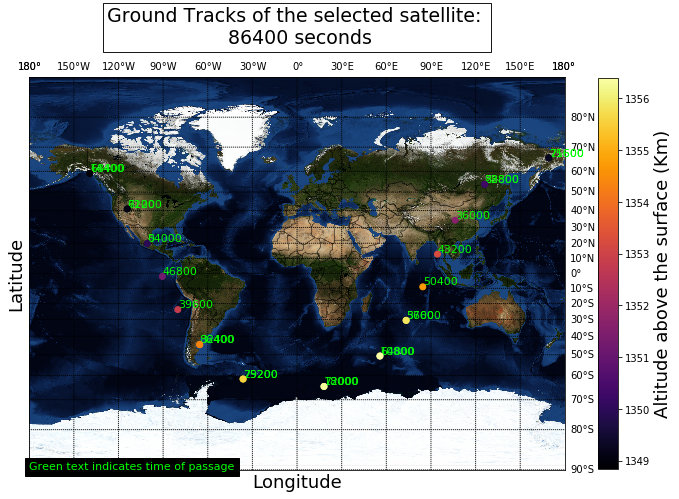

In [152]:
fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill', 
              llcrnrlat = -90,
              urcrnrlat = 90,
              llcrnrlon = -180,
              urcrnrlon = 180,
              resolution = 'c')

m.bluemarble()
m.drawcountries()
m.drawparallels(np.arange(-90,90,10),labels=[False,True,True,False])
m.drawmeridians(np.arange(-180,180,30),labels=[False,True,True,False])



# For a more 'classical' map un-hash this section and hash the .bluemarble()
# m.drawcoastlines()
# m.fillcontinents(color='moccasin',lake_color='dodgerblue')
# m.drawmapboundary(fill_color='dodgerblue')

lons = long_array
lats = lat_array

x, y = m(lons, lats)

data = m.scatter(x, y, marker='o',c=h_array, cmap ='inferno' ,zorder=5)

for i,txt in enumerate (time_since_prop):
    plt.annotate(txt,(x[i], y[i]),verticalalignment='bottom',
            fontsize=11,color='lime')

plt.xlabel('Longitude',fontname="Console",fontsize=18,position = (0.5,2))
plt.ylabel('Latitude',fontname="Console",fontsize=18, position = (0.5,0.5))

plt.title('Ground Tracks of the selected satellite: \n %i seconds'%newdt,
          position = (0.5,1.07),
          fontsize = 19, color = 'black',
          bbox=dict(facecolor='white', alpha=0.9),
          )
plt.text(1,2,'Green text indicates time of passage',fontsize=11,color='lime',
         bbox=dict(facecolor='black', alpha=1)
        ) #MOVE THIS TO THE RIGHT PLACE AND FIX COLOR

cbar = plt.colorbar(data, shrink =0.8)
cbar.set_label('Altitude above the surface (Km)',fontsize=18, fontname="Console")

#plt.legend()
plt.show()